# Training

The AI behind KI-cker is trained on recorded games. These are basically all the games that have been ever played on the machine. We have encapsulated getting the data in the `DataProvider` class. The input is not raw data, but preprocessing to score how well the AI did has been done. The following illustrates loading a random sample. `32` would be the batch size of the sample used when training with stochastic gradient descent. 8 will be sufficient for our demonstration purposes.

In [1]:
from kicker.train import DataProvider

sample_size = 8
frame_count = 5

data_provider = DataProvider(filename='../train/training_data.h5', frame_count=frame_count)
batch = data_provider.get_batch(sample=sample_size)

/home/helge/.virtualenvs/deeplearning3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Conversion using tensorflow

The images are stored encoded as JPEGs. When training, the decoding is done through tensorflow. Furthermore, one sees that the bottom that the shape of the output is
```
(batch_size, height, width, number_of_frames + 1)
```
Here, it should be noted that the neural net gets 5 consecutive frames as input. This is done, so that it can recognize movement.

In [2]:
from kicker.train import Trainer
from kicker.neural_net import NeuralNet

import tensorflow as tf

trainer = Trainer(NeuralNet())

feed_dict = {
    'observations:0': [s['observations'] for s in batch]
}

sess = tf.Session()
imgs = sess.run(trainer.observations_img, feed_dict = feed_dict)

imgs.shape

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


(8, 320, 480, 6)

# Visualization

The following shows the frames seen by the neural net as images.

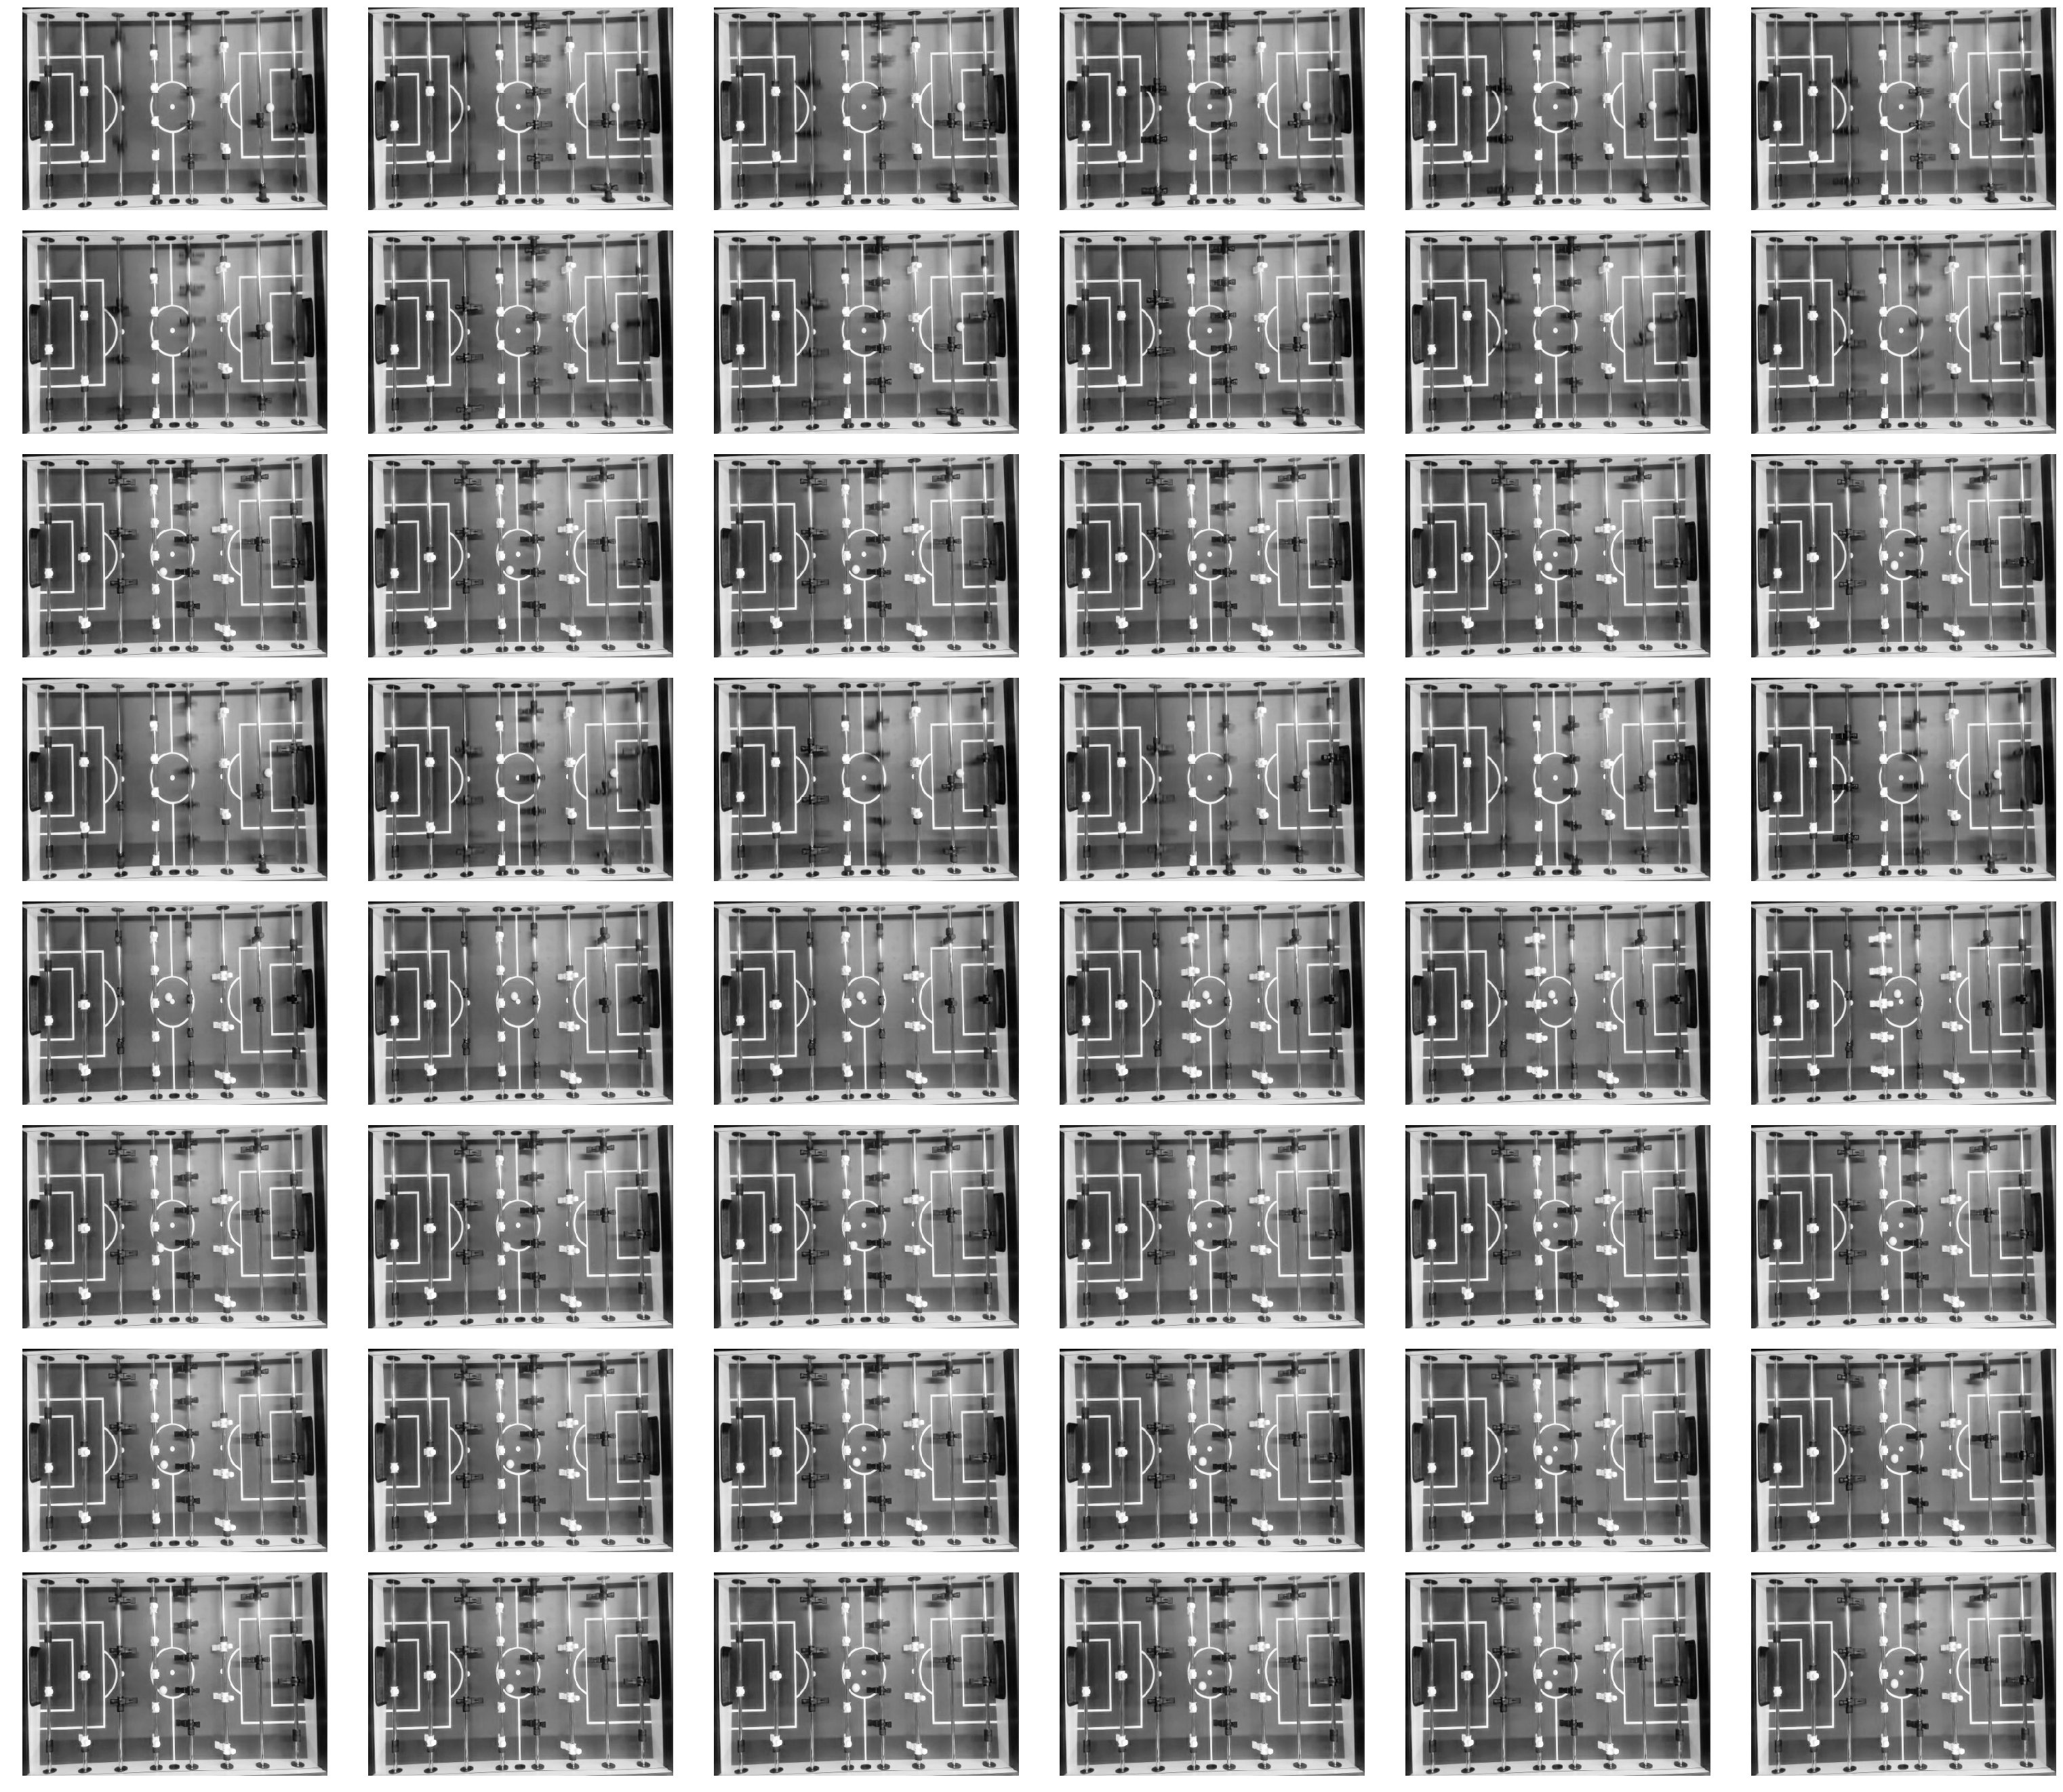

In [3]:
from matplotlib import pyplot, cm

number_of_cols = frame_count + 1
number_of_rows = sample_size

figure, axes = pyplot.subplots(ncols=number_of_cols, nrows=number_of_rows, figsize=(number_of_cols * 9, number_of_rows * 6))
for j in range(number_of_rows):
    for k in range(number_of_cols):
        axes[j, k].axis('off')
        axes[j, k].imshow(imgs[j,:,:, k],  cmap=cm.Greys_r)
        
pyplot.subplots_adjust(wspace=0.1, hspace=0.1)
figure